# Homework 3: Univariate Statistics

In [1]:
MY_UNIQNAME = 'tengdann'

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q1. For 20 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

cwur = pd.read_csv('data/world-university-rankings/cwurData.csv', thousands = ',')
shanghai = pd.read_csv('data/world-university-rankings/shanghaiData.csv', thousands = ',')
times = pd.read_csv('data/world-university-rankings/timesData.csv', thousands = ',')

cwur_clean = cwur.dropna()
shanghai_clean = shanghai.dropna()
times_clean = times[times.total_score != '-']
times_score_clean = times_clean.total_score.astype('float64')

def _multiplePlots(series):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

    # Histogram
    sns.distplot(series, ax = axs[0,0])
    
    # Boxplot
    sns.boxplot(x = series, ax = axs[0,1])
    
    # Lag plot code here
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current, lag, fit_reg = False, ax = axs[1,0])
    ax.set_ylabel('y_i-1')
    ax.set_xlabel("y_i")
    
    # QQ plot code here
    qntls, xr = stats.probplot(series, fit=False)
    hm = sns.regplot(xr,qntls, ax = axs[1,1])

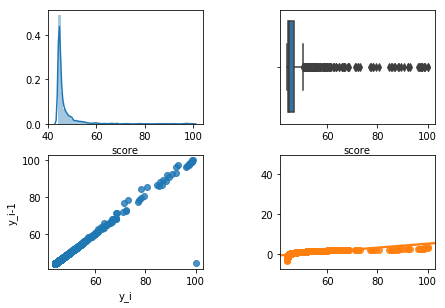

In [125]:
_multiplePlots(cwur_clean.score)

The overall scores for the CWUR dataset appears to have a heavy right-skewed normal distribution. The middle 50th percentile lies between 43 and 47, with multiple outliers past 47.

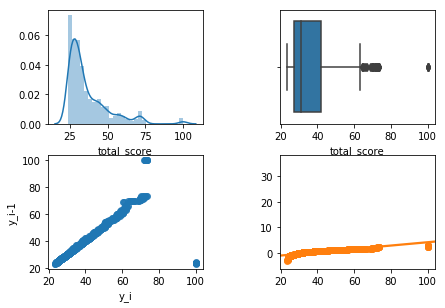

In [126]:
_multiplePlots(shanghai_clean.total_score)

The overall scores for the Shanghai dataset appears to have a right-skewed normal distribution. The middle 50th percentile lies between 25 and 60, with several outliers past 60.

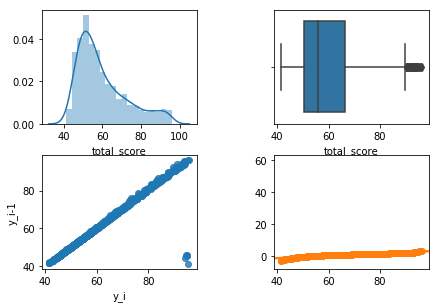

In [130]:
_multiplePlots(times_score_clean)

The overall scores for the Times dataset appears to have a right-skewed normal distribution. The middle 50th percentiles lies between 40 and 90, with several outliers past 90.

### Q2. For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2016.

* Plot the distribution using the `multiplePlots` function from class. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

In [2]:
times_student_clean = times.dropna()
def multiplePlots(series):
    
    fig, axs = plt.subplots(2,2, figsize = (10,5))
    plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

    # Histogram
    sns.distplot(series, ax = axs[0,0])
    
    # Lag plot code here
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current, lag, fit_reg = False, ax = axs[0,1])
    ax.set_ylabel('y_i-1')
    ax.set_xlabel("y_i")
    
    # QQ plot code here
    qntls, xr = stats.probplot(series, fit=False)
    hm = sns.regplot(xr,qntls, ax = axs[1,0])
    
    # Run Sequence doe here
    ax = sns.regplot(np.arange(len(series)), series, ax = axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

Mean: 23845.077
Median: 20584.0
Max: 2413    Anadolu University
Name: university_name, dtype: object


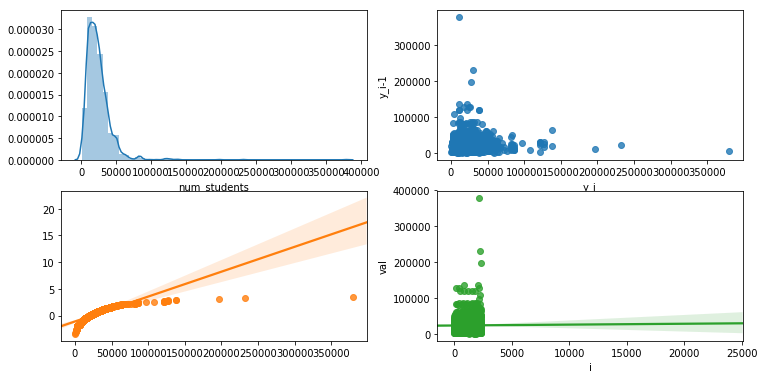

In [34]:
multiplePlots(times_student_clean.num_students)
print('Mean: %.3f' % np.mean(times_student_clean.num_students))
print('Median:', np.median(times_student_clean.num_students))
print('Max:', times_student_clean.sort_values('num_students', ascending = False).head(1).university_name)

The multiple plots indicate that the number of students has a power distribution. As well, is not randomly distributed.
The histogram indicates either a heavily right-skewed normal distribution or a power distribution; however, the QQ plot indicates it is not normally distributed.

The mean and median are spread apart, being separated by about 3000 students. This means that there are outliers on the high end pulling the mean higher.

The university with the most students is Anadolu

### Q3. For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

In [29]:
times_cleaned = times[times.international != '-'].copy()
times_cleaned['international'] = times_cleaned.international.astype('float64')

times_cleaned_us = times_cleaned[times_cleaned.country == 'United States of America'].copy()
times_cleaned_us_2011 = times_cleaned_us[times_cleaned_us.year == 2011].copy()
times_cleaned_us_2016 = times_cleaned_us[times_cleaned_us.year == 2016].copy()

times_cleaned_int = times_cleaned[times_cleaned.country != 'United States of America'].copy()
times_cleaned_int_2011 = times_cleaned_int[times_cleaned_int.year == 2011].copy()
times_cleaned_int_2016 = times_cleaned_int[times_cleaned_int.year == 2016].copy()

Mean US 2011: 42.231  |  Mean Int 2011: 61.503
Mean US 2016: 42.432  |  Mean Int 2016: 49.855

Median US 2011: 38.6  |  Median Int 2011: 63.2
Median US 2016: 40.2  |  Median Int 2016: 47.0


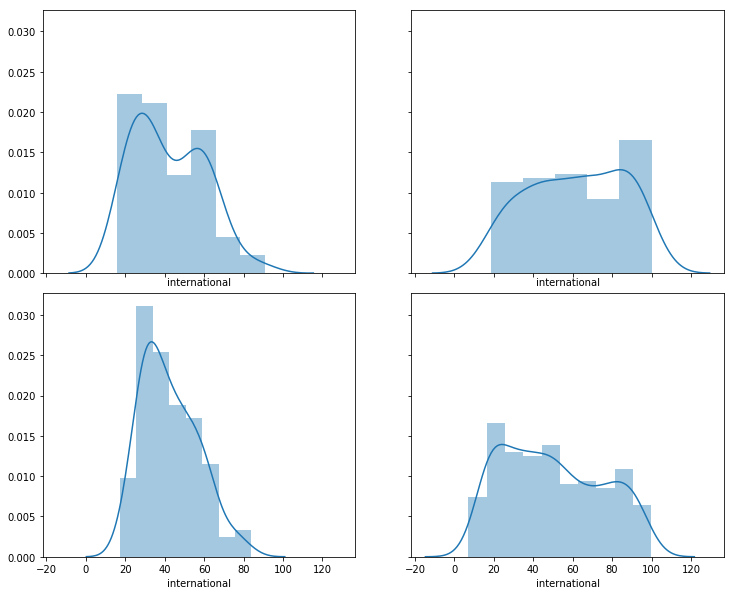

In [59]:
fig, axs  = plt.subplots(2,2, sharey = True, sharex = True, figsize = (10,8))
plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

sns.distplot(times_cleaned_us_2011.international, ax = axs[0,0])
sns.distplot(times_cleaned_int_2011.international, ax = axs[0,1])
sns.distplot(times_cleaned_us_2016.international, ax = axs[1,0])
sns.distplot(times_cleaned_int_2016.international, ax = axs[1,1])

print('Mean US 2011: %.3f' % np.mean(times_cleaned_us_2011.international), ' | ', 'Mean Int 2011: %.3f' % np.mean(times_cleaned_int_2011.international))
print('Mean US 2016: %.3f' % np.mean(times_cleaned_us_2016.international), ' | ', 'Mean Int 2016: %.3f' % np.mean(times_cleaned_int_2016.international))
print()
print('Median US 2011:', np.median(times_cleaned_us_2011.international), ' | ', 'Median Int 2011:', np.median(times_cleaned_int_2011.international))
print('Median US 2016:', np.median(times_cleaned_us_2016.international), ' | ', 'Median Int 2016:', np.median(times_cleaned_int_2016.international))

For universities in the United States, the mean and median scores between 2011 and 2016 did not change by much. The mean increased by about 0.2, while the median increased by about 2.

For universities outside the United States, the mean and median scores between 2011 and 2016 decreased by a good deal. The mean decreased by about 12, while the median decreased by 16.

Looking at the graphs, US universities had a local maximum at around 55 disappear between 2011 and 2016. The 2011 US graph appears to have a bimodal distribution; the 2016 graph appears to have a right-skewed normal distribution.

Looking at the graphs, non-US universities shifted from a left-skewed uniform distribution in 2011 to a right-skewed uniform distribution in 2016. A local maximum also appeared around 80 in 2016.

### Q4. For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [7]:
cwur_2012 = cwur[cwur.year == 2012].copy().head(10)
cwur_2013 = cwur[cwur.year == 2013].copy().head(10)
cwur_2014 = cwur[cwur.year == 2014].copy().head(10)
cwur_2015 = cwur[cwur.year == 2015].copy().head(10)

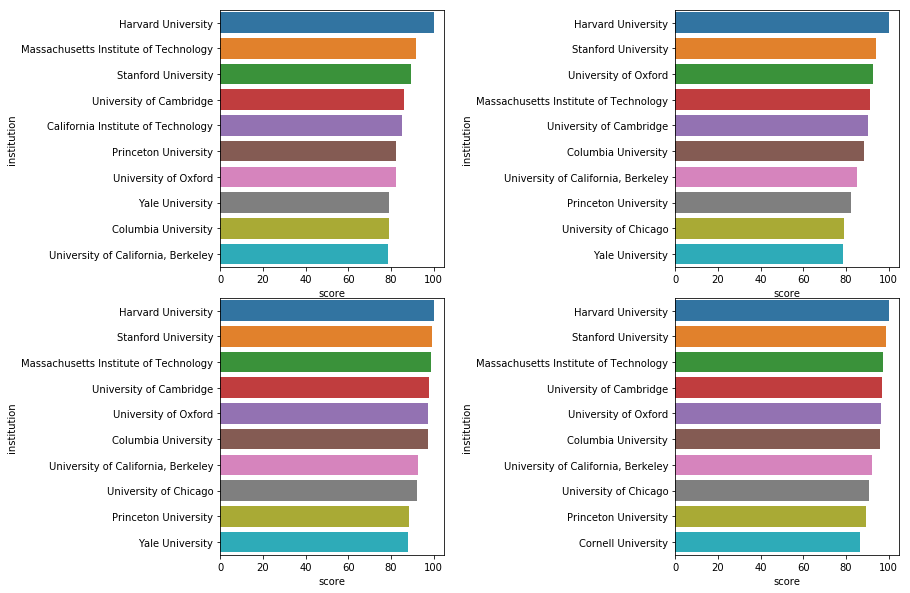

In [61]:
fig, axs  = plt.subplots(2,2, figsize = (10,8))
plt.tight_layout(pad = 0.5, w_pad = 20, h_pad = 1.0)

sns.barplot(y = cwur_2012.institution, x = cwur_2012.score, orient = 'h', ax = axs[0,0])
sns.barplot(y = cwur_2013.institution, x = cwur_2013.score, orient = 'h', ax = axs[0,1])
sns.barplot(y = cwur_2014.institution, x = cwur_2014.score, orient = 'h', ax = axs[1,0])
sns.barplot(y = cwur_2015.institution, x = cwur_2015.score, orient = 'h', ax = axs[1,1])

I chose to look at only the top 10 rankings (by score) for each year. Consistently, Harvard University ranks at the top of the pack every single year. Of the 10 universities that appeared in 2012, Cal Tech and Yale were the only universities to not remain in the top 10. Instead, after 2012, Cal Tech was replace with the university of Chicago. MIT, Stanford, and Cambridge have all competed for 2nd, 3rd, and 4th every year. Oxford edged out Cambridge in 2013, but Cambridge reclaimed its spot in the top 4 in 2014.

In [2]:
# Collaboration with jbhammon
cwur_date = cwur.copy()
cwur_date['year'] = cwur_date['year'].astype(str)
cwur_pivot = cwur_date[['institution','world_rank','year' ]].pivot(index='institution', columns='year',values='world_rank')
cwur_pivot_clean = cwur_pivot.dropna()
cwur_pivot_top10 = cwur_pivot_clean[(cwur_pivot_clean['2012'] <= 10) &
                                    (cwur_pivot_clean['2013'] <= 10) &
                                    (cwur_pivot_clean['2014'] <= 10) &
                                    (cwur_pivot_clean['2015'] <= 10)]
cwur_pivot_top10_t = cwur_pivot_top10.transpose()
cwur_pivot_top10_t.reset_index(inplace = True)
cwur_pivot_top10_t

institution,year,Columbia University,Harvard University,Massachusetts Institute of Technology,Princeton University,Stanford University,"University of California, Berkeley",University of Cambridge,University of Oxford
0,2012,9.0,1.0,2.0,6.0,3.0,10.0,4.0,7.0
1,2013,6.0,1.0,4.0,8.0,2.0,7.0,5.0,3.0
2,2014,6.0,1.0,3.0,9.0,2.0,7.0,4.0,5.0
3,2015,6.0,1.0,3.0,9.0,2.0,7.0,4.0,5.0


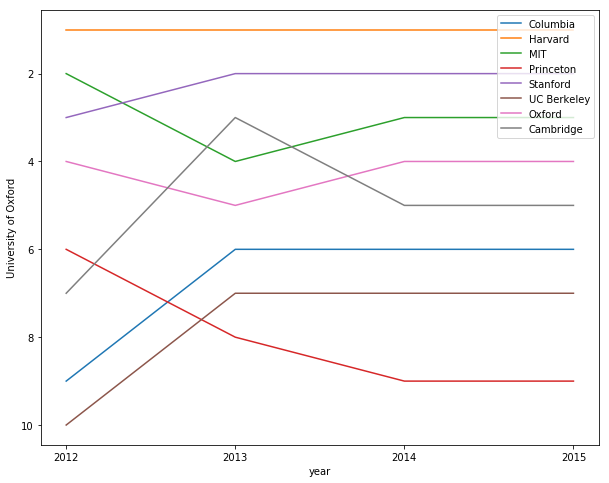

In [21]:
fig, axs  = plt.subplots(1,1, figsize = (10,8))

plot = sns.lineplot(x = 'year', y = 'Columbia University', data = cwur_pivot_top10_t, label = 'Columbia')
plot = sns.lineplot(x = 'year', y = 'Harvard University', data = cwur_pivot_top10_t, label = 'Harvard')
plot = sns.lineplot(x = 'year', y = 'Massachusetts Institute of Technology', data = cwur_pivot_top10_t, label = 'MIT')
plot = sns.lineplot(x = 'year', y = 'Princeton University', data = cwur_pivot_top10_t, label = 'Princeton')
plot = sns.lineplot(x = 'year', y = 'Stanford University', data = cwur_pivot_top10_t, label = 'Stanford')
plot = sns.lineplot(x = 'year', y = 'University of California, Berkeley', data = cwur_pivot_top10_t, label = 'UC Berkeley')
plot = sns.lineplot(x = 'year', y = 'University of Cambridge', data = cwur_pivot_top10_t, label = 'Oxford')
plot = sns.lineplot(x = 'year', y = 'University of Oxford', data = cwur_pivot_top10_t, label = 'Cambridge')
plot.invert_yaxis()
plt.legend(loc = 'upper right')

The above graph shows the change in rankings over the years for the schools that consistently stayed in the top 10. Harvard is consistently 1.

### Q5. For 15 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 1995, but above the average in 2010.

* Sort the nations by difference between 1995 and 2010
* Plot the lag, and explain your answers.

In [77]:
edu_exp = pd.read_csv('data/world-university-rankings/education_expenditure_supplementary_data.csv').dropna()
edu_exp_HE = edu_exp[edu_exp.institute_type == 'Higher Education Institutions ']
avg_1995 = edu_exp_HE[edu_exp_HE.country == 'OECD Average']['1995'].values[0]
avg_2010 = edu_exp_HE[edu_exp_HE.country == 'OECD Average']['2010'].values[0]
difference_HE = edu_exp_HE[(edu_exp_HE['1995'] <= avg_1995) & (edu_exp_HE['2010'] >= avg_2010)]
difference_HE

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
88,Iceland,Higher Education Institutions,Public,0.7,0.8,1.1,1.2,1.1,1.1
89,Ireland,Higher Education Institutions,Public,0.9,1.2,1.0,1.4,1.3,1.2
103,Spain,Higher Education Institutions,Public,0.8,0.9,0.9,1.1,1.1,1.0


Austria, Belgium, Iceland, Ireland, and Spain all spent less than the OECD Average in 1995, but more that than the OECD Average in 2010.

Text(0.5, 0, 'y_i')

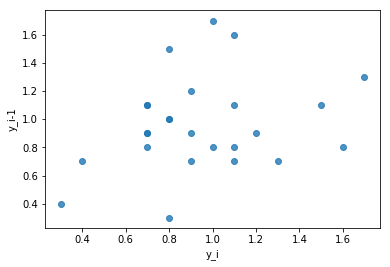

In [6]:
lag = edu_exp_HE['1995'].copy()
lag = np.array(lag[:-1])
current = edu_exp_HE['1995'][1:]
ax = sns.regplot(current, lag, fit_reg = False)
ax.set_ylabel('y_i-1')
ax.set_xlabel("y_i")

Text(0.5, 0, 'y_i')

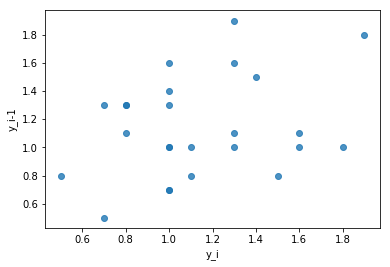

In [34]:
lag = edu_exp_HE['2010'].copy()
lag = np.array(lag[:-1])
current = edu_exp_HE['2010'][1:]
ax = sns.regplot(current, lag, fit_reg = False)
ax.set_ylabel('y_i-1')
ax.set_xlabel("y_i")

The two lag plots of 1995 and 2010 for higher education spendings seems to show random distribution; however, there are not enough points to say with any confidence that random distribution exists.

### Q6. For 15 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2012 and 2015? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

Mean 2012: 49.717 | Median 2012: 52.0
Mean 2013: 49.769 | Median 2013: 52.0
Mean 2014: 49.736 | Median 2014: 52.0
Mean 2015: 49.497 | Median 2015: 52.0


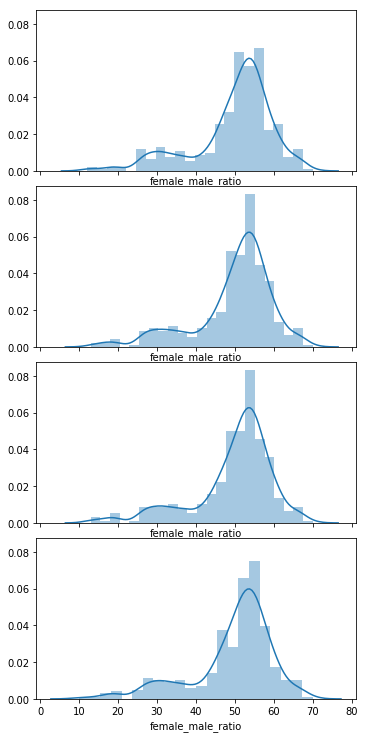

In [62]:
_times = times[times.female_male_ratio != '-'].copy().dropna()

def convert_ratio(row):
    row['female_male_ratio'] = int(row['female_male_ratio'][0:2])
    
    return row['female_male_ratio']

_times['female_male_ratio'] = _times.apply(convert_ratio, axis = 1)
ratios_2012 = _times[_times.year == 2012].copy()
ratios_2013 = _times[_times.year == 2013].copy()
ratios_2014 = _times[_times.year == 2014].copy()
ratios_2015 = _times[_times.year == 2015].copy()

fig, axs = plt.subplots(4,1, sharex = True, sharey = True, figsize = (5,10))
plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 0.5)

sns.distplot(ratios_2012['female_male_ratio'], ax = axs[0])
sns.distplot(ratios_2013['female_male_ratio'], ax = axs[1])
sns.distplot(ratios_2014['female_male_ratio'], ax = axs[2])
sns.distplot(ratios_2015['female_male_ratio'], ax = axs[3])

print('Mean 2012: %.3f' % np.mean(ratios_2012.female_male_ratio), '|', 'Median 2012:', np.median(ratios_2012.female_male_ratio))
print('Mean 2013: %.3f' % np.mean(ratios_2013.female_male_ratio), '|', 'Median 2013:', np.median(ratios_2013.female_male_ratio))
print('Mean 2014: %.3f' % np.mean(ratios_2014.female_male_ratio), '|', 'Median 2014:', np.median(ratios_2014.female_male_ratio))
print('Mean 2015: %.3f' % np.mean(ratios_2015.female_male_ratio), '|', 'Median 2015:', np.median(ratios_2015.female_male_ratio))

The means and medians for all 4 years do not change by much. The median does not change at all, while the mean varies by 0.3% at most. There is, however, very little distribution on either side of the mean or the median.

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [41]:
# Collaborated with nehab on this answer
print(times.year.unique())
print(shanghai.year.unique())
print(cwur.year.unique())

site = pd.read_html('https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states#survey-answer', header = 0)[0]
site.columns = ['pub_rank', 'rank', 'university_name', 'city', 'state']
cwur_rename = cwur.rename(index = str, columns = {'institution': 'university_name'}, copy = True)

site_1 = pd.merge(site[['rank', 'university_name']], times[['university_name', 'world_rank', 'year']], on = 'university_name')
site_2 = pd.merge(site_1, shanghai[['university_name', 'world_rank', 'year']], on = ['university_name', 'year'])
site_3 = pd.merge(site_2, cwur_rename[['university_name', 'world_rank', 'year']], on = ['university_name', 'year'])
site_3 = site_3[['university_name', 'year', 'rank', 'world_rank_x', 'world_rank_y', 'world_rank']]

site_3.columns = ['university_name', 'year', 'site_rank', 'times_rank', 'shanghai_rank', 'cwur_rank']
site_3

def site_rank_clean(row):
    row['site_rank'] = row['site_rank'].replace('=', '')
    
    return int(row['site_rank'])

def does_support(row, row_name):
    try:
        if '-' in row[row_name]:
            temp = row[row_name].split('-')
            if int(temp[0]) <= row['site_rank'] <= int(temp[1]):
                return 'Yes'
    except:    
        if abs(int(row[row_name]) - row['site_rank']) <= 2:
            return 'Yes'
    
    return 'No'

site_3.site_rank = site_3.apply(site_rank_clean, axis = 1)
site_3['times_support'] = site_3.apply(does_support, row_name = 'times_rank', axis = 1)
site_3['shanghai_support'] = site_3.apply(does_support, row_name = 'shanghai_rank', axis = 1)
site_3['cwur_support'] = site_3.apply(does_support, row_name = 'cwur_rank', axis = 1)
site_3[(site_3.times_support == 'Yes') | (site_3.shanghai_support == 'Yes') | (site_3.cwur_support == 'Yes')]

[2011 2012 2013 2014 2015 2016]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
[2012 2013 2014 2015]


,university_name,year,site_rank,times_rank,shanghai_rank,cwur_rank,times_support,shanghai_support,cwur_support
7,University of North Carolina at Chapel Hill,2012,37,43,41,36,No,No,Yes
53,University of Iowa,2014,155,161,151-200,125,No,Yes,No
54,University of Iowa,2015,155,175,151-200,141,No,Yes,No
61,"University of California, Riverside",2015,212,150,101-150,214,No,No,Yes
76,University of Kansas,2014,297,276-300,201-300,203,Yes,Yes,No
77,University of Kansas,2015,297,301-350,201-300,196,No,Yes,No
78,University of Vermont,2014,306,301-350,301-400,320,Yes,Yes,No
79,University of Vermont,2015,306,351-400,301-400,324,No,Yes,No
81,San Diego State University,2014,324,351-400,301-400,348,No,Yes,No
82,San Diego State University,2015,324,301-350,301-400,361,Yes,Yes,No


The Times Higher Education article is for rankings as of 2019. However, all the datasets do not have rankings past 2016. Given how trends change rapidly over time, trying to use data that is at least 3 years old to support current claims is problematic.

However, if we were to use older data, there are some rankings from the Kaggle dataset that do support the claims made by the Times article. The Kaggle datasets sometimes contain a range of rankings; there are some schools (Wayne State University or University of Kansas (2014)) that encompass the ranking claimed by the Times article. In addition, the method of sorting I used took that any article ranking that was within 2 of the Kaggle rankings counted as support.

As such, the above listed table contains the schools that have some support from the Kaggle dataset.